In [1]:
import warnings
warnings.filterwarnings('ignore')

# Modelos 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
from Funciones import *

In [4]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

In [5]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

## Modelos normales

In [6]:
pipeline_RF = crear_pipeline_preprocesamiento(
    modelo=RandomForestClassifier(random_state=0),
    usar_smote=False,
    escalar=True
)

In [7]:
pipe_RF=pipeline_RF(X_train)

In [8]:
RF=pipe_RF.fit(X_train,y_train)


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.61      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409



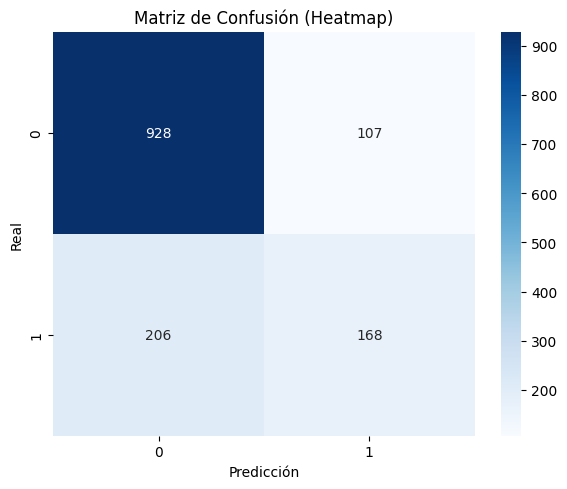

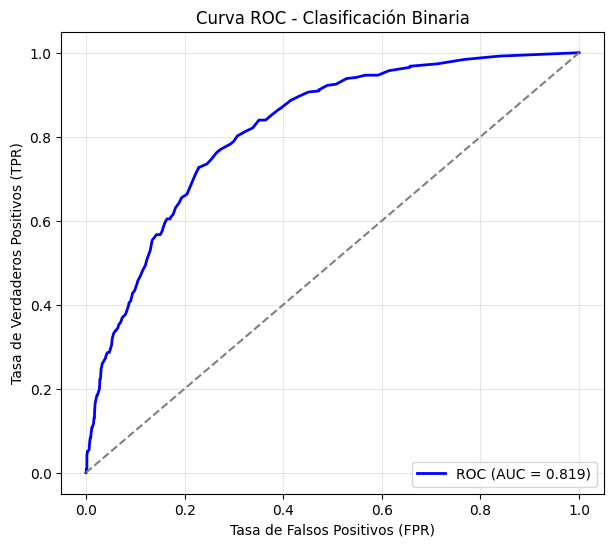

{'Accuracy': 0.7778566359119943,
 'Precision': 0.7632818502371377,
 'Recall': 0.7778566359119943,
 'F1-score': 0.7659831598091119}

In [9]:
evaluar_modelo_clasificacion(RF,X_test,y_test)

Podemos observar que al realizar el random forest podemos observar que en general los scores hallados son bastante aceptables en general, al examinarlos mas a fondo por clase podemos ver que identifica mejor los No que los yes con scores mucho mayores en general, el ROC AUC es de 0.82 lo cual es bastante aceptable

In [10]:
pipeline_XGB = crear_pipeline_preprocesamiento(
    modelo=XGBClassifier(),
    usar_smote=False,
    escalar=True
)

In [11]:
pipe_XGB=pipeline_XGB(X_train)

In [12]:
XGB = pipe_XGB.fit(X_train, y_train)


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



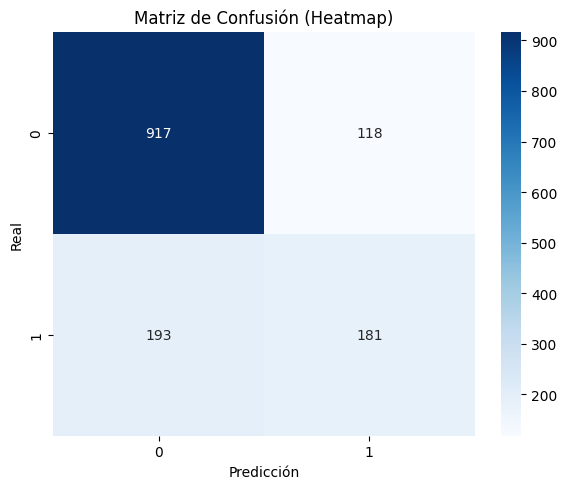

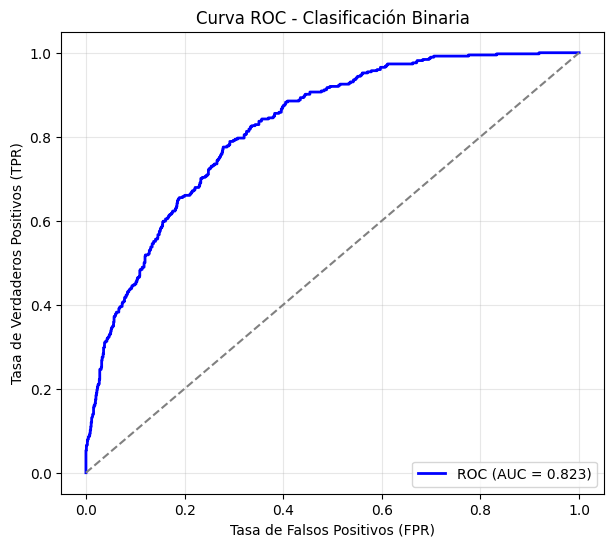

{'Accuracy': 0.7792760823278921,
 'Precision': 0.7675243991009103,
 'Recall': 0.7792760823278921,
 'F1-score': 0.7708360110778442}

In [13]:
evaluar_modelo_clasificacion(XGB,X_test,y_test)

Podemos observar que el AUC sigue siendo el mismo si se compara con el de RandomForest normal, y que los scores de yes suben un poco a comparacion de RandomForest en recall y f1, pero sus resultados son similares a los de random forest

In [14]:
pipeline_LGBM = crear_pipeline_preprocesamiento(
    modelo=LGBMClassifier(random_state=0),
    usar_smote=False,
    escalar=True
)

In [15]:
pipe_LGBM=pipeline_LGBM(X_train)

In [16]:
LGBM=pipe_LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328



 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



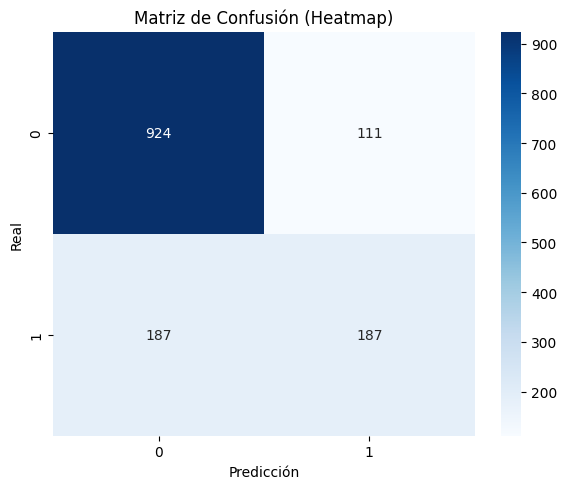

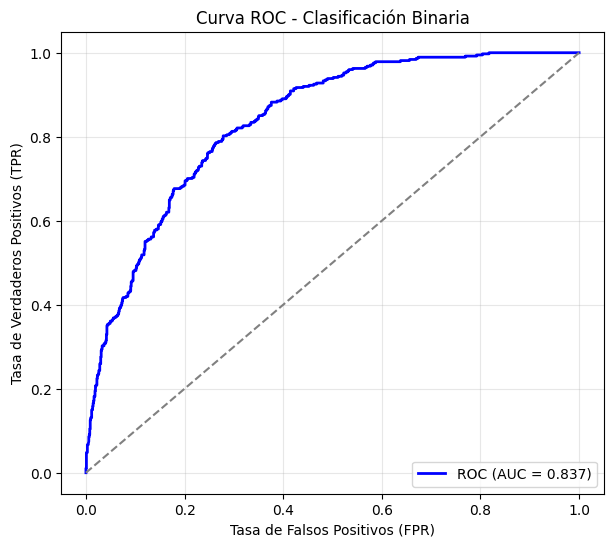

{'Accuracy': 0.7885024840312278,
 'Precision': 0.7774899605221477,
 'Recall': 0.7885024840312278,
 'F1-score': 0.7802878662592082}

In [17]:
evaluar_modelo_clasificacion(LGBM,X_test,y_test)

Los resultados de LGBM son mayores a comparacion de los 2 anteriores no solo para la clase yes sino que el ROC es de 0.84, ademas los scores generales tambien son ligeramente mas altos

In [18]:
pipeline_Cat = crear_pipeline_preprocesamiento(
    modelo=CatBoostClassifier(random_state=0),
    usar_smote=False,
    escalar=True
)

In [19]:
pipe_Cat=pipeline_Cat(X_train)

In [20]:
Cat=pipe_Cat.fit(X_train,y_train)

Learning rate set to 0.021554
0:	learn: 0.6777130	total: 141ms	remaining: 2m 20s
1:	learn: 0.6636405	total: 144ms	remaining: 1m 11s
2:	learn: 0.6497015	total: 147ms	remaining: 48.9s
3:	learn: 0.6378296	total: 151ms	remaining: 37.5s
4:	learn: 0.6256008	total: 154ms	remaining: 30.6s
5:	learn: 0.6148095	total: 156ms	remaining: 25.9s
6:	learn: 0.6043957	total: 159ms	remaining: 22.6s
7:	learn: 0.5940544	total: 162ms	remaining: 20s
8:	learn: 0.5851612	total: 164ms	remaining: 18.1s
9:	learn: 0.5764579	total: 168ms	remaining: 16.6s
10:	learn: 0.5676649	total: 170ms	remaining: 15.3s
11:	learn: 0.5596121	total: 173ms	remaining: 14.3s
12:	learn: 0.5520169	total: 176ms	remaining: 13.3s
13:	learn: 0.5453038	total: 178ms	remaining: 12.6s
14:	learn: 0.5386681	total: 181ms	remaining: 11.9s
15:	learn: 0.5319244	total: 184ms	remaining: 11.3s
16:	learn: 0.5263603	total: 187ms	remaining: 10.8s
17:	learn: 0.5205782	total: 190ms	remaining: 10.3s
18:	learn: 0.5148021	total: 192ms	remaining: 9.92s
19:	learn: 


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



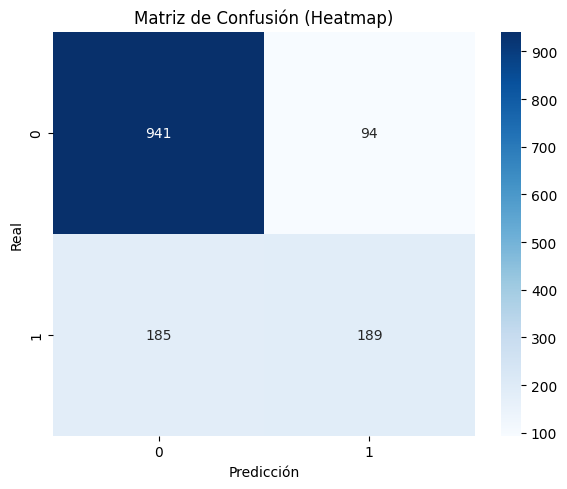

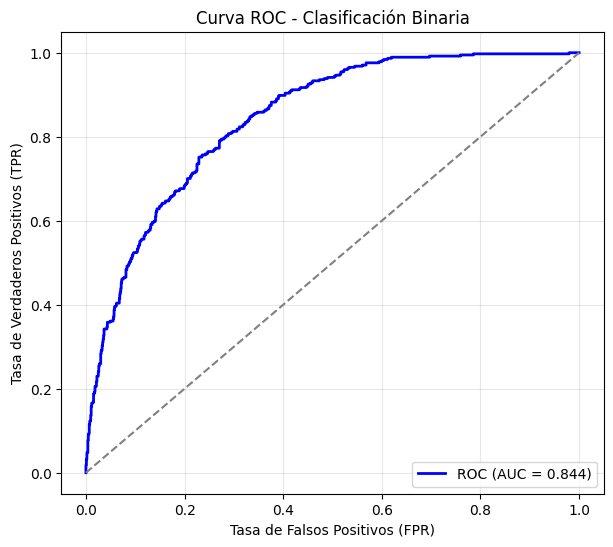

{'Accuracy': 0.8019872249822569,
 'Precision': 0.791146207323927,
 'Recall': 0.8019872249822569,
 'F1-score': 0.7924431837560543}

In [21]:
evaluar_modelo_clasificacion(Cat,X_test,y_test)

El modelo de Catboost es el mejor modelo entre los 4 benchmark ya que sus scores generales son mas altos de entre los 4 y su ROC es igual al de LGBM. 

## Modelos balanceados por SMOTE

In [22]:
pipeline_RF_bal = crear_pipeline_preprocesamiento(
    modelo=RandomForestClassifier(random_state=0),
    usar_smote=True,
    escalar=True
)

In [23]:
pipe_RF_bal=pipeline_RF_bal(X_train)

In [24]:
RF_bal=pipe_RF_bal.fit(X_train,y_train)


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1035
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



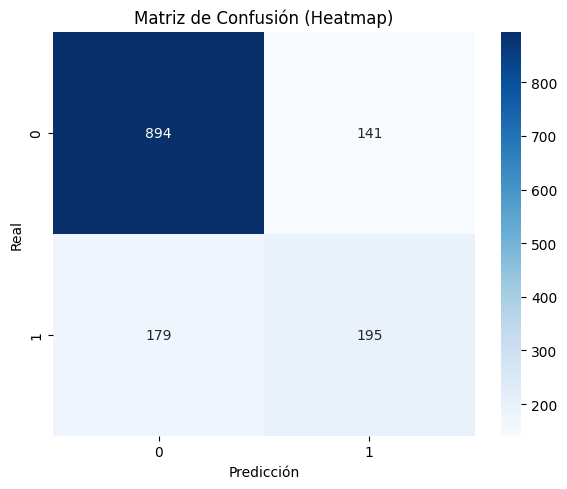

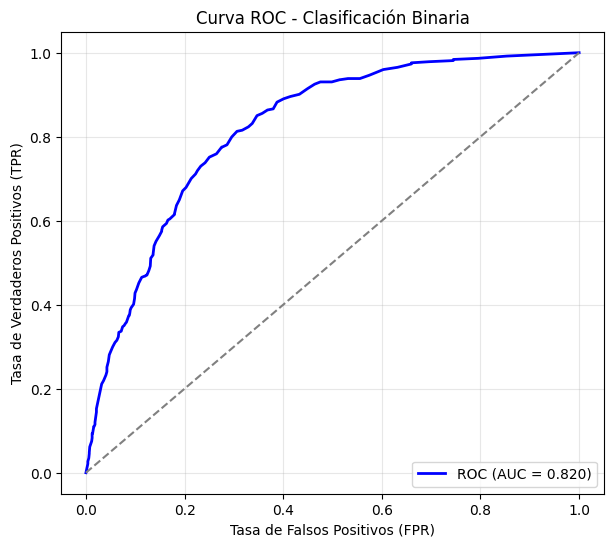

{'Accuracy': 0.772888573456352,
 'Precision': 0.7660701257743668,
 'Recall': 0.772888573456352,
 'F1-score': 0.7688579632311521}

In [25]:
evaluar_modelo_clasificacion(RF_bal,X_test,y_test)

Podemos observar que despues de realizar balanceo, bajaron un poco los scores de No y el ROC baja unas decimas pero queda mas balanceado ahora 

In [26]:
pipeline_XGB_bal = crear_pipeline_preprocesamiento(
    modelo=XGBClassifier(),
    usar_smote=True,
    escalar=True
)

In [27]:
pipe_XGB_bal=pipeline_XGB_bal(X_train)

In [28]:
XGB_bal = pipe_XGB_bal.fit(X_train, y_train)


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1035
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



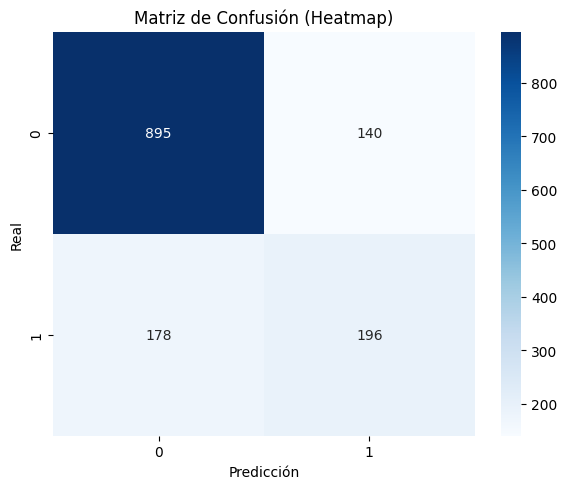

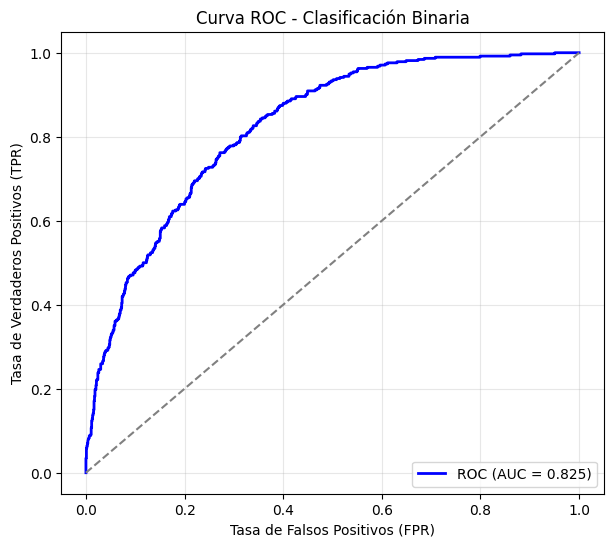

{'Accuracy': 0.7743080198722498,
 'Precision': 0.7675447038531643,
 'Recall': 0.7743080198722498,
 'F1-score': 0.7703026009609573}

In [29]:
evaluar_modelo_clasificacion(XGB_bal,X_test,y_test)

Igualmente al realizar el balanceo no se genero un cambio muy grande en los resultados de XGBoost, aunque disminuyo la precision de 1 y aumento el recall y disminuyo ligeramente las metricas globales por 0.01 

In [30]:
pipeline_LGBM_bal = crear_pipeline_preprocesamiento(
    modelo=LGBMClassifier(random_state=0),
    usar_smote=True,
    escalar=True
)

In [31]:
pipe_LGBM_bal=pipeline_LGBM_bal(X_train)

In [32]:
LGBM_bal = pipe_LGBM_bal.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3495
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000



 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.57      0.57       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409



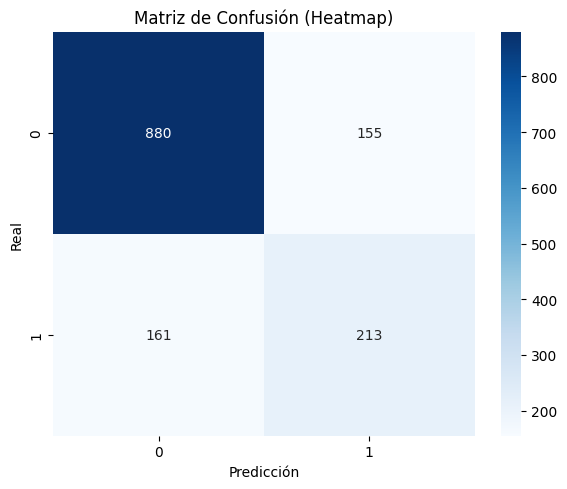

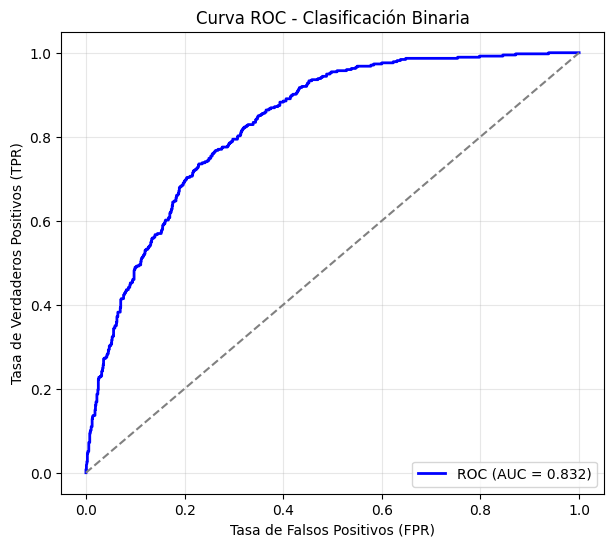

{'Accuracy': 0.7757274662881476,
 'Precision': 0.7745924627235247,
 'Recall': 0.7757274662881476,
 'F1-score': 0.7751447972792752}

In [33]:
evaluar_modelo_clasificacion(LGBM_bal,X_test,y_test)

Al realizar el balanceo en el modelo de LGBM podemos observar que es el que mas se asemeja a su version no balanceada con casi el mismo ROC por lo que al balancear no hubo una mejora tan significativa pero al menos esta mas balanceado

In [34]:
pipeline_Cat_bal = crear_pipeline_preprocesamiento(
    modelo=CatBoostClassifier(random_state=0),
    usar_smote=True,
    escalar=True
)

In [35]:
pipe_Cat_bal=pipeline_Cat_bal(X_train)

In [36]:
Cat_bal = pipe_Cat_bal.fit(X_train, y_train)

Learning rate set to 0.025403
0:	learn: 0.6788164	total: 4.6ms	remaining: 4.59s
1:	learn: 0.6649833	total: 8.67ms	remaining: 4.32s
2:	learn: 0.6504436	total: 13.1ms	remaining: 4.36s
3:	learn: 0.6400321	total: 17.3ms	remaining: 4.3s
4:	learn: 0.6286208	total: 21.7ms	remaining: 4.32s
5:	learn: 0.6182178	total: 26.1ms	remaining: 4.32s
6:	learn: 0.6092196	total: 30.2ms	remaining: 4.29s
7:	learn: 0.5993864	total: 34.2ms	remaining: 4.25s
8:	learn: 0.5917288	total: 38.4ms	remaining: 4.22s
9:	learn: 0.5840593	total: 42.5ms	remaining: 4.21s
10:	learn: 0.5751411	total: 47ms	remaining: 4.23s
11:	learn: 0.5675586	total: 51ms	remaining: 4.2s
12:	learn: 0.5597962	total: 55ms	remaining: 4.17s
13:	learn: 0.5530090	total: 59.8ms	remaining: 4.21s
14:	learn: 0.5467612	total: 63.7ms	remaining: 4.18s
15:	learn: 0.5404105	total: 68.1ms	remaining: 4.19s
16:	learn: 0.5347061	total: 72.4ms	remaining: 4.19s
17:	learn: 0.5295712	total: 76.4ms	remaining: 4.17s
18:	learn: 0.5241935	total: 80.8ms	remaining: 4.17s
1


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1035
           1       0.60      0.59      0.59       374

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



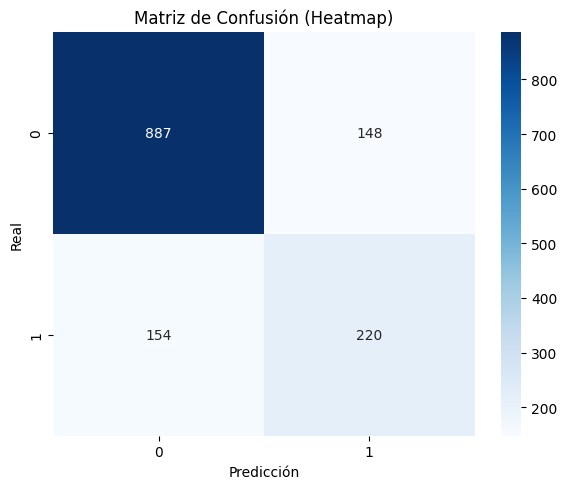

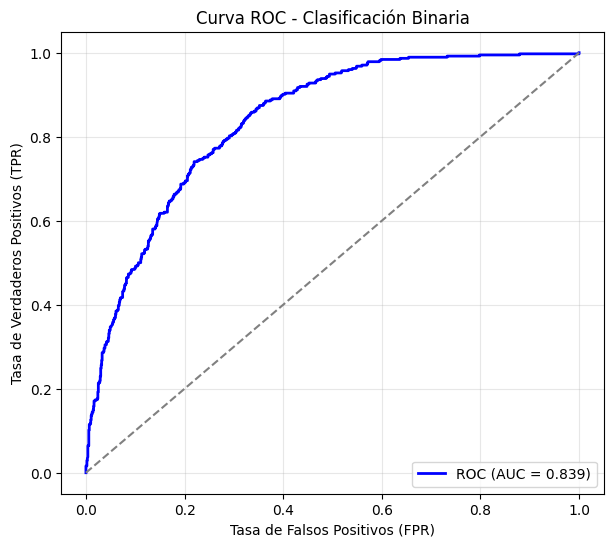

{'Accuracy': 0.7856635911994322,
 'Precision': 0.7845809542873693,
 'Recall': 0.7856635911994322,
 'F1-score': 0.78510673664032}

In [37]:
evaluar_modelo_clasificacion(Cat_bal,X_test,y_test)

En cuanto a CatBoost hubo una decaida de la curva ROC de manera ligera pero sigue siendo 0.84, y se puede apreciar que esta mas balanceado el modelo a comparacion de antes con los cambios entre las metricas 

## Gridsearch

Realizamos el gridsearch para cada uno de los modelos

### Parametros

In [38]:
param_grid_rf = {
    'modelo__n_estimators': [200, 400],
    'modelo__max_depth': [10, 20, None],
    'modelo__min_samples_split': [2, 5],
    'modelo__min_samples_leaf': [1, 2],
    'modelo__max_features': ['sqrt', 'log2'],
    'modelo__bootstrap': [True],
    'modelo__criterion': ['gini', 'entropy']
}

In [39]:
param_grid_xgb = {
    'modelo__n_estimators': [200, 400],
    'modelo__learning_rate': [0.05, 0.1],
    'modelo__subsample': [0.8, 1.0],
    'modelo__colsample_bytree': [0.8, 1.0],
    'modelo__gamma': [0, 0.3],
    'modelo__min_child_weight': [1, 3],
    'modelo__reg_alpha': [0, 0.1],
    'modelo__reg_lambda': [1, 5]
}

In [40]:
param_grid_lgbm = {
    'modelo__n_estimators': [200, 400],
    'modelo__learning_rate': [0.05, 0.1],
    'modelo__num_leaves': [31, 63],
    'modelo__min_child_samples': [10, 20],
    'modelo__subsample': [0.8, 1.0],
    'modelo__colsample_bytree': [0.8, 1.0],
    'modelo__reg_alpha': [0, 0.1],
    'modelo__reg_lambda': [0, 0.1],
    'modelo__max_bin': [255],
    'modelo__verbose': [-1]
}

In [41]:
param_grid_cat = {
    'modelo__iterations': [300, 500],
    'modelo__learning_rate': [0.05, 0.1],
    'modelo__depth': [6, 8],
    'modelo__l2_leaf_reg': [3, 5],
    'modelo__bagging_temperature': [0.5, 1],
    'modelo__border_count': [64, 128],
    'modelo__random_strength': [1, 2],
    'modelo__subsample': [0.8, 1.0],
    'modelo__verbose': [0]
}

In [42]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

### implementacion

In [43]:
resultados_rf = realizar_gridsearch(
    modelo=pipe_RF_bal,
    param_grid=param_grid_rf,
    X_train=X_train,
    y_train=y_train,
    scoring='roc_auc', 
    cv=cv
)


 Iniciando GridSearch para: Pipeline ...
 GridSearch finalizado en 929.70 segundos
  Mejor score (roc_auc): 0.8414
  Mejores parámetros: {'modelo__bootstrap': True, 'modelo__criterion': 'entropy', 'modelo__max_depth': 10, 'modelo__max_features': 'log2', 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 5, 'modelo__n_estimators': 200}



In [44]:
resultados_XG = realizar_gridsearch(
    modelo=pipe_XGB_bal,
    param_grid=param_grid_xgb,
    X_train=X_train,
    y_train=y_train,
    scoring='roc_auc', 
    cv=cv
)


 Iniciando GridSearch para: Pipeline ...
 GridSearch finalizado en 561.53 segundos
  Mejor score (roc_auc): 0.8415
  Mejores parámetros: {'modelo__colsample_bytree': 0.8, 'modelo__gamma': 0.3, 'modelo__learning_rate': 0.05, 'modelo__min_child_weight': 3, 'modelo__n_estimators': 200, 'modelo__reg_alpha': 0, 'modelo__reg_lambda': 5, 'modelo__subsample': 1.0}



In [45]:
resultados_LGBM = realizar_gridsearch(
    modelo=pipe_LGBM_bal,
    param_grid=param_grid_lgbm,
    X_train=X_train,
    y_train=y_train,
    scoring='roc_auc', 
    cv=cv
)


 Iniciando GridSearch para: Pipeline ...
 GridSearch finalizado en 492.24 segundos
  Mejor score (roc_auc): 0.8381
  Mejores parámetros: {'modelo__colsample_bytree': 0.8, 'modelo__learning_rate': 0.05, 'modelo__max_bin': 255, 'modelo__min_child_samples': 10, 'modelo__n_estimators': 200, 'modelo__num_leaves': 31, 'modelo__reg_alpha': 0.1, 'modelo__reg_lambda': 0, 'modelo__subsample': 0.8, 'modelo__verbose': -1}



In [46]:
resultados_Cat = realizar_gridsearch(
    modelo=pipe_Cat_bal,
    param_grid=param_grid_cat,
    X_train=X_train,
    y_train=y_train,
    scoring='roc_auc', 
    cv=cv
)


 Iniciando GridSearch para: Pipeline ...
 GridSearch finalizado en 2503.84 segundos
  Mejor score (roc_auc): 0.8411
  Mejores parámetros: {'modelo__bagging_temperature': 1, 'modelo__border_count': 64, 'modelo__depth': 6, 'modelo__iterations': 300, 'modelo__l2_leaf_reg': 5, 'modelo__learning_rate': 0.05, 'modelo__random_strength': 2, 'modelo__subsample': 1.0, 'modelo__verbose': 0}



In [47]:
mejor_modelo_rf = resultados_rf['best_model']


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.56      0.69      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



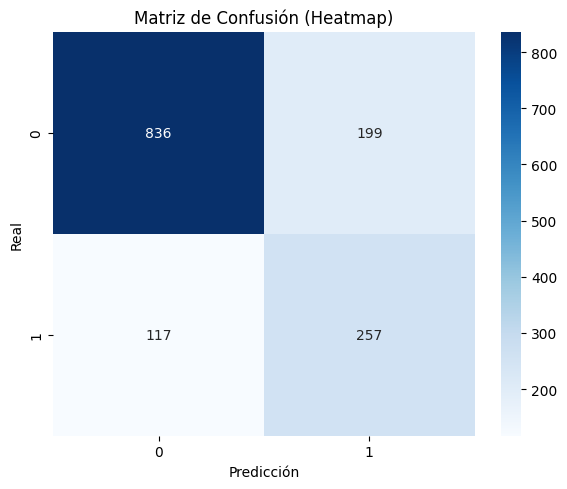

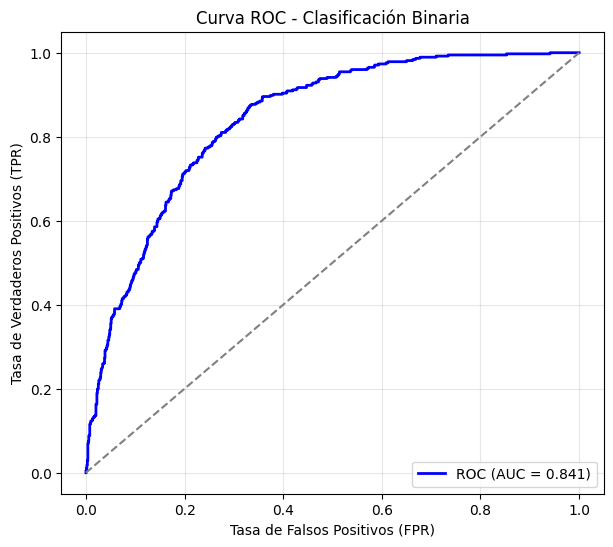

{'Accuracy': 0.7757274662881476,
 'Precision': 0.7939800790425299,
 'Recall': 0.7757274662881476,
 'F1-score': 0.7821806500628267}

In [48]:
evaluar_modelo_clasificacion(mejor_modelo_rf,X_test,y_test)

Podemos observar que en randomforest luego de hacer gridsearch hubo una mejora significativa en el recall de yes y tambien que el ROC aumento a 0.84 y hubo mejora en la precision global del modelo 

In [49]:
mejor_modelo_xg = resultados_XG['best_model']


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



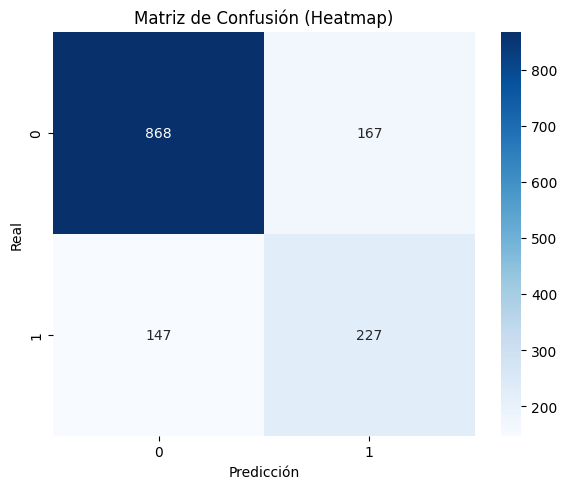

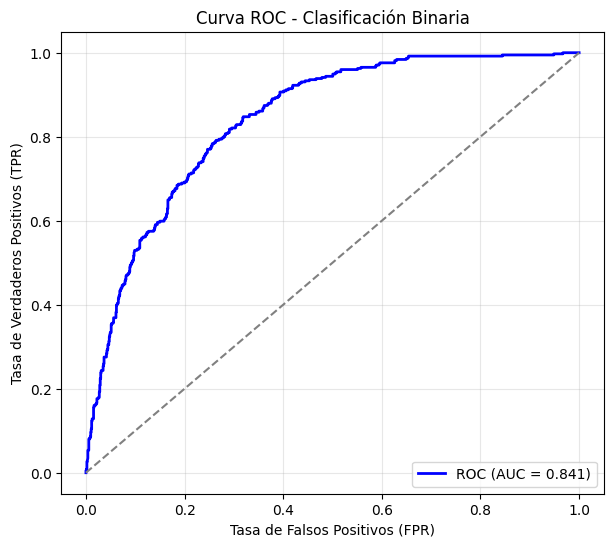

{'Accuracy': 0.7771469127040455,
 'Precision': 0.7811075980385155,
 'Recall': 0.7771469127040455,
 'F1-score': 0.778961557380833}

In [50]:
evaluar_modelo_clasificacion(mejor_modelo_xg,X_test,y_test)

Al realizar gridsearch de xgboost, hubo un aumento de la curva ROC tambien a 0.84 y hubo un aumento en los scores de las 3 metricas tanto en yes como en no ligeramente, asi como tambien hubo mejoras en las metricas generales. 

In [51]:
mejor_modelo_lgbm = resultados_LGBM['best_model']


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.60      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.79      0.78      0.79      1409



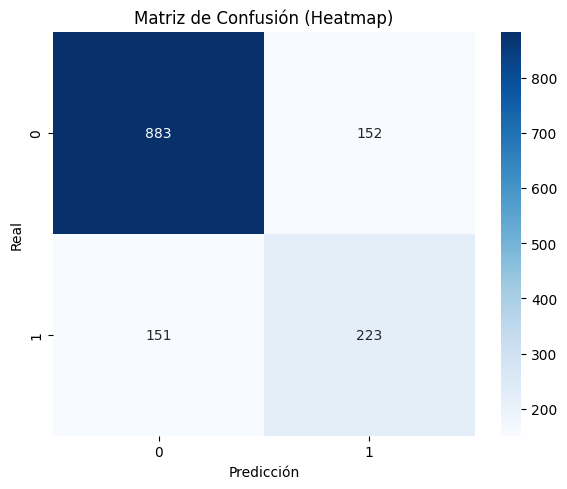

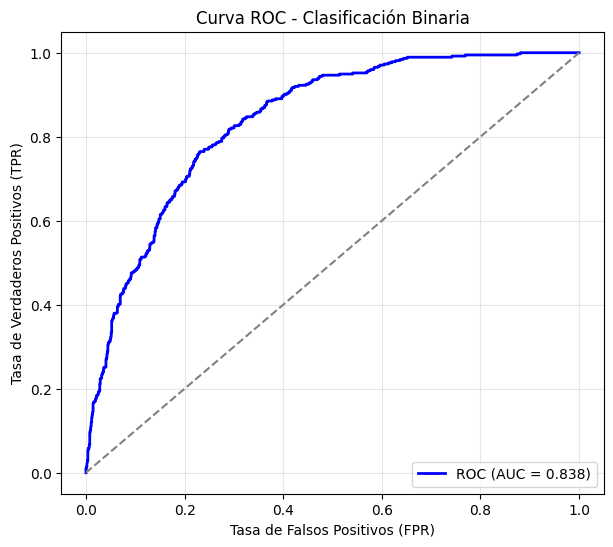

{'Accuracy': 0.7849538679914834,
 'Precision': 0.7851378981668458,
 'Recall': 0.7849538679914834,
 'F1-score': 0.7850454548710578}

In [52]:
evaluar_modelo_clasificacion(mejor_modelo_lgbm,X_test,y_test)

Podemos observar que aumento ligeramente ROC AUC aunque las metricas en comparacion a la de el modelo balanceado por SMOTE en 0 o 1 siguen siendo practicamente iguales 

In [53]:
mejor_modelo_cat = resultados_Cat['best_model']


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1035
           1       0.60      0.63      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



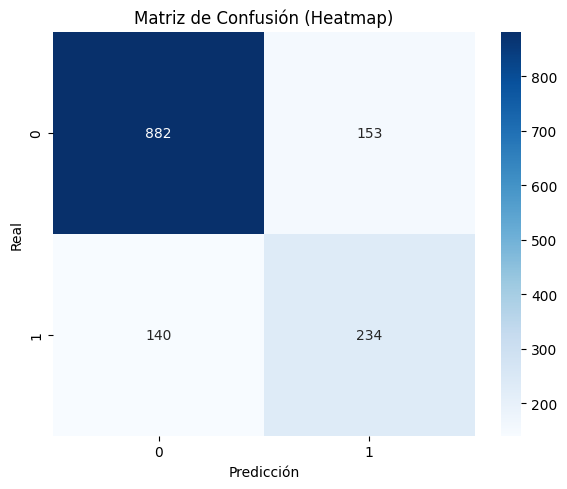

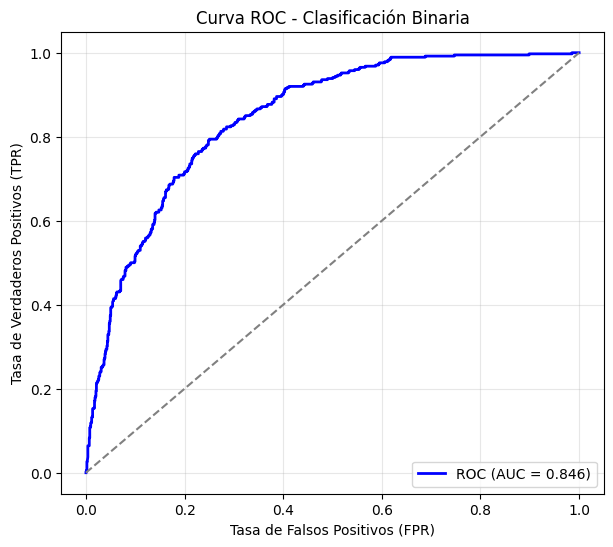

{'Accuracy': 0.7920511000709723,
 'Precision': 0.7944348566117194,
 'Recall': 0.7920511000709723,
 'F1-score': 0.7931701669366552}

In [54]:
evaluar_modelo_clasificacion(mejor_modelo_cat,X_test,y_test)

Al realizar gridsearch hubo una ligera mejora en el ROC, pero aparte de eso solo hubo una ligera mejora en las metricas de yes 

## Feature importance 

In [55]:
modelo_rf, importancias_rf, features_rf=obtener_importancias_y_features(mejor_modelo_rf)
modelo_xg, importancias_xg, features_xg=obtener_importancias_y_features(mejor_modelo_xg)
modelo_lgbm, importancias_lgbm, features_lgbm=obtener_importancias_y_features(mejor_modelo_lgbm)
modelo_cat, importancias_cat, features_cat=obtener_importancias_y_features(mejor_modelo_cat)


🔹 Top 15 características más importantes - Random Forest
                     Característica  Importancia
       cat__Contract_Month-to-month     0.116919
                        num__tenure     0.091485
                  num__TotalCharges     0.076736
             cat__Contract_Two year     0.072980
             cat__OnlineSecurity_No     0.067365
cat__PaymentMethod_Electronic check     0.060044
                cat__TechSupport_No     0.056895
                num__MonthlyCharges     0.052025
   cat__InternetService_Fiber optic     0.032523
             cat__Contract_One year     0.030721
            cat__OnlineSecurity_Yes     0.028419
               cat__OnlineBackup_No     0.023349
           cat__PaperlessBilling_No     0.019499
               cat__TechSupport_Yes     0.018522
          cat__PaperlessBilling_Yes     0.018019


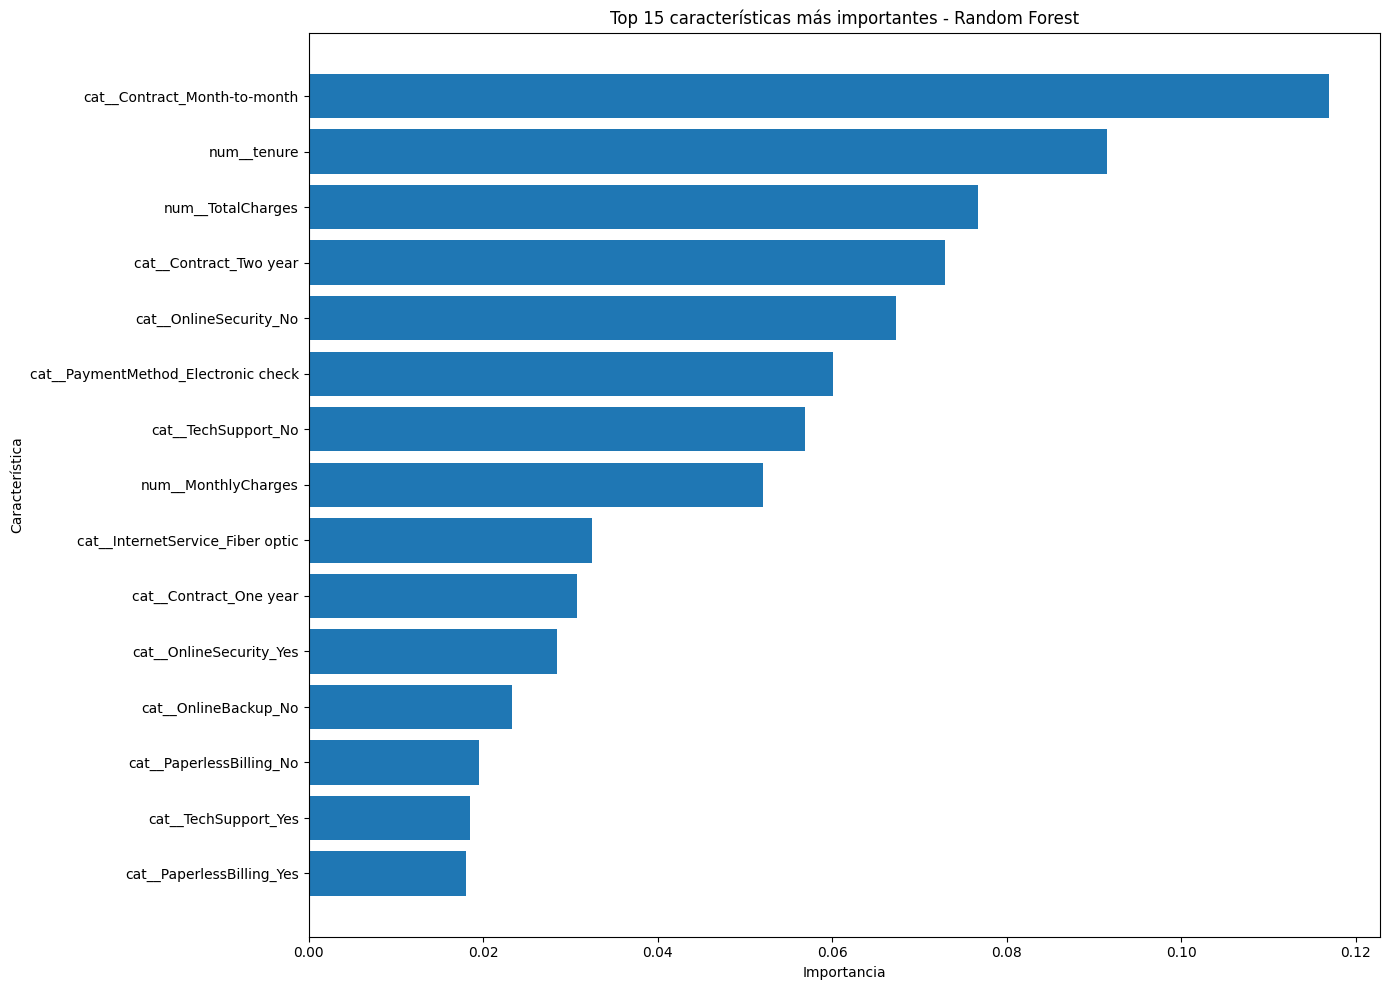


🔹 Top 15 características más importantes - XGBoost
                     Característica  Importancia
       cat__Contract_Month-to-month     0.282562
             cat__OnlineSecurity_No     0.147127
             cat__Contract_Two year     0.049919
   cat__InternetService_Fiber optic     0.041405
cat__PaymentMethod_Electronic check     0.039519
                cat__TechSupport_No     0.037734
                   cat__Partner_Yes     0.032551
             cat__Contract_One year     0.029288
            cat__OnlineSecurity_Yes     0.020820
           cat__InternetService_DSL     0.020758
          cat__PaperlessBilling_Yes     0.019580
               cat__OnlineBackup_No     0.019410
               cat__TechSupport_Yes     0.017786
              cat__MultipleLines_No     0.016283
           cat__PaperlessBilling_No     0.015693


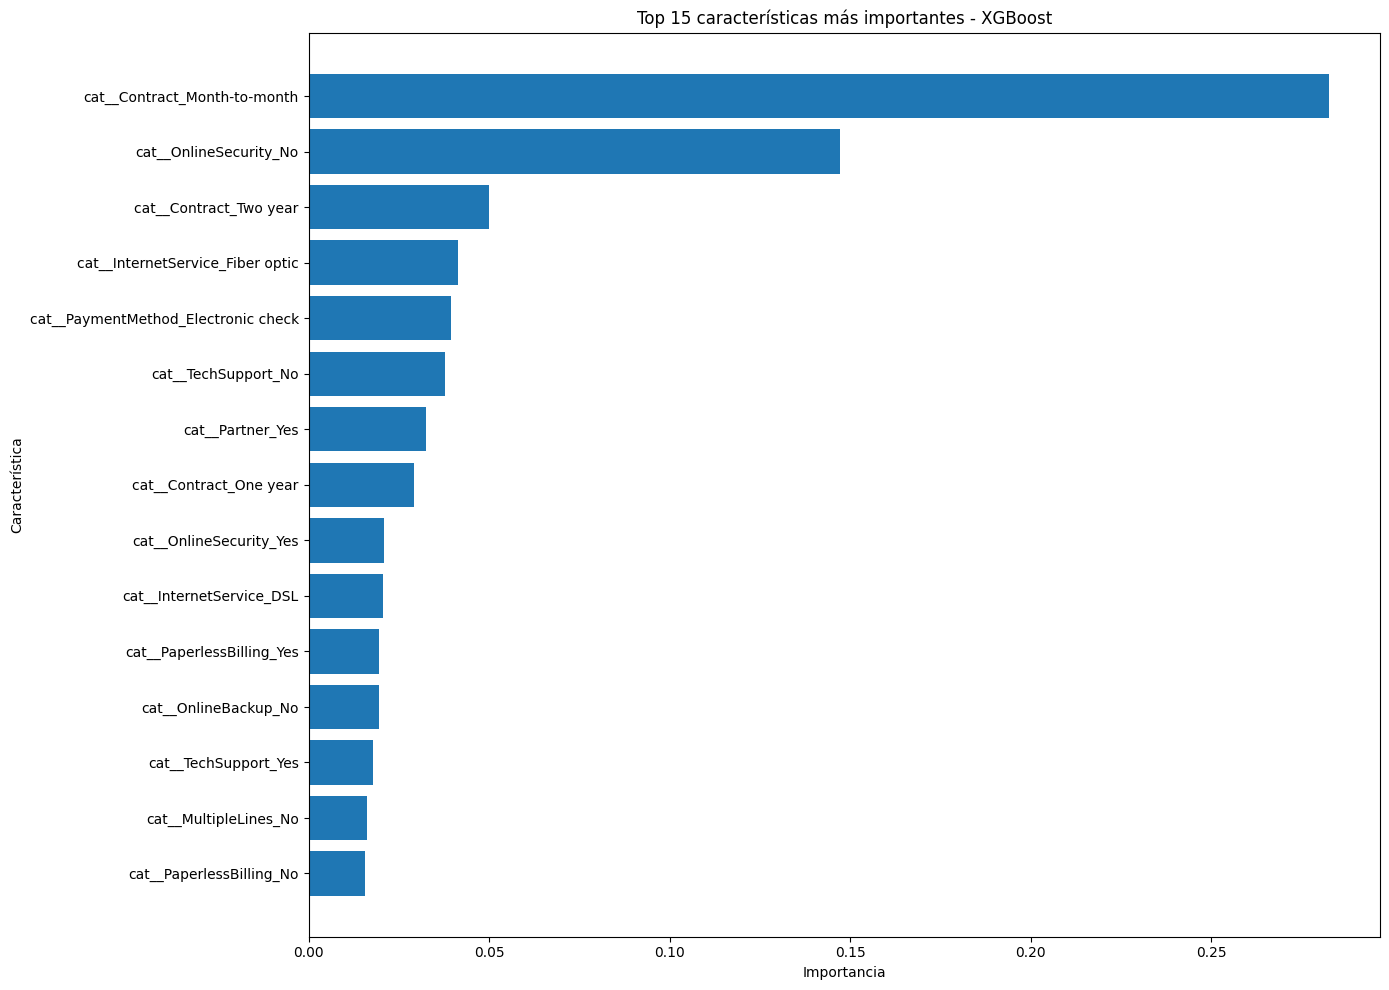


🔹 Top 15 características más importantes - LightGBM
                              Característica  Importancia
                         num__MonthlyCharges         1166
                                 num__tenure         1095
                           num__TotalCharges          850
         cat__PaymentMethod_Electronic check          187
                    cat__PaperlessBilling_No          154
                        cat__OnlineBackup_No          153
cat__PaymentMethod_Bank transfer (automatic)          139
  cat__PaymentMethod_Credit card (automatic)          125
                       cat__MultipleLines_No          123
                      cat__Contract_One year          122
                cat__Contract_Month-to-month          114
                      cat__OnlineSecurity_No          106
                             cat__Partner_No          105
                          cat__Dependents_No          105
                         cat__TechSupport_No          100


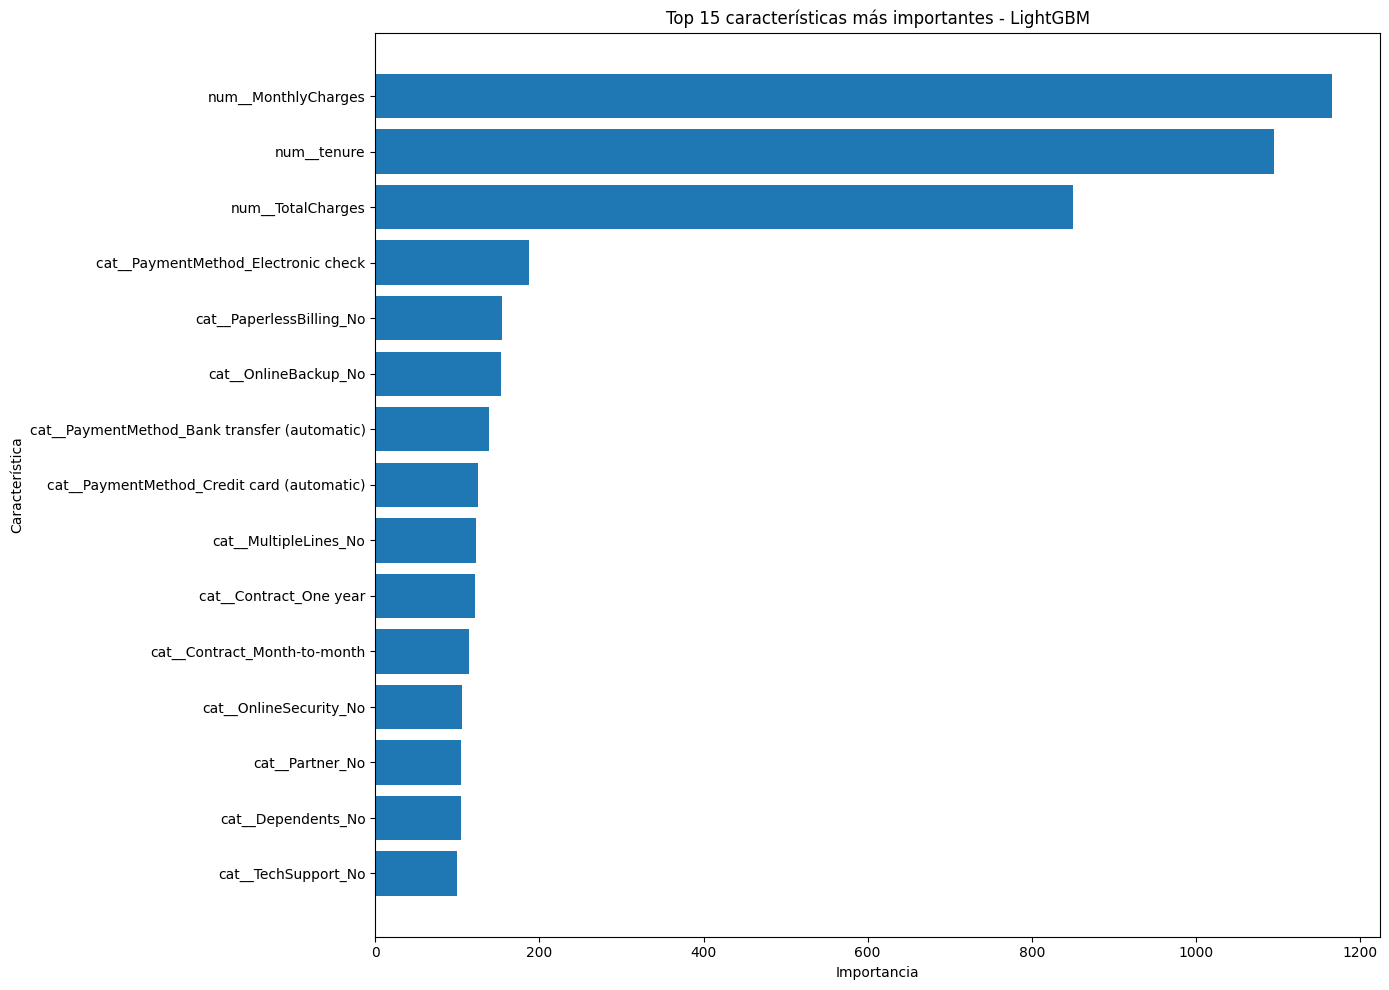


🔹 Top 15 características más importantes - CatBoost
                              Característica  Importancia
         cat__PaymentMethod_Electronic check    10.505318
                                 num__tenure     9.194032
                cat__Contract_Month-to-month     6.031093
                      cat__OnlineSecurity_No     4.813376
                        cat__OnlineBackup_No     4.575378
  cat__PaymentMethod_Credit card (automatic)     4.328004
                       cat__MultipleLines_No     4.306645
                         cat__TechSupport_No     3.778647
                    cat__PaperlessBilling_No     3.567089
                           num__TotalCharges     3.479657
                   cat__PaperlessBilling_Yes     2.783182
                     cat__OnlineSecurity_Yes     2.676589
cat__PaymentMethod_Bank transfer (automatic)     2.554472
                         cat__Dependents_Yes     2.509029
                       cat__OnlineBackup_Yes     2.456136


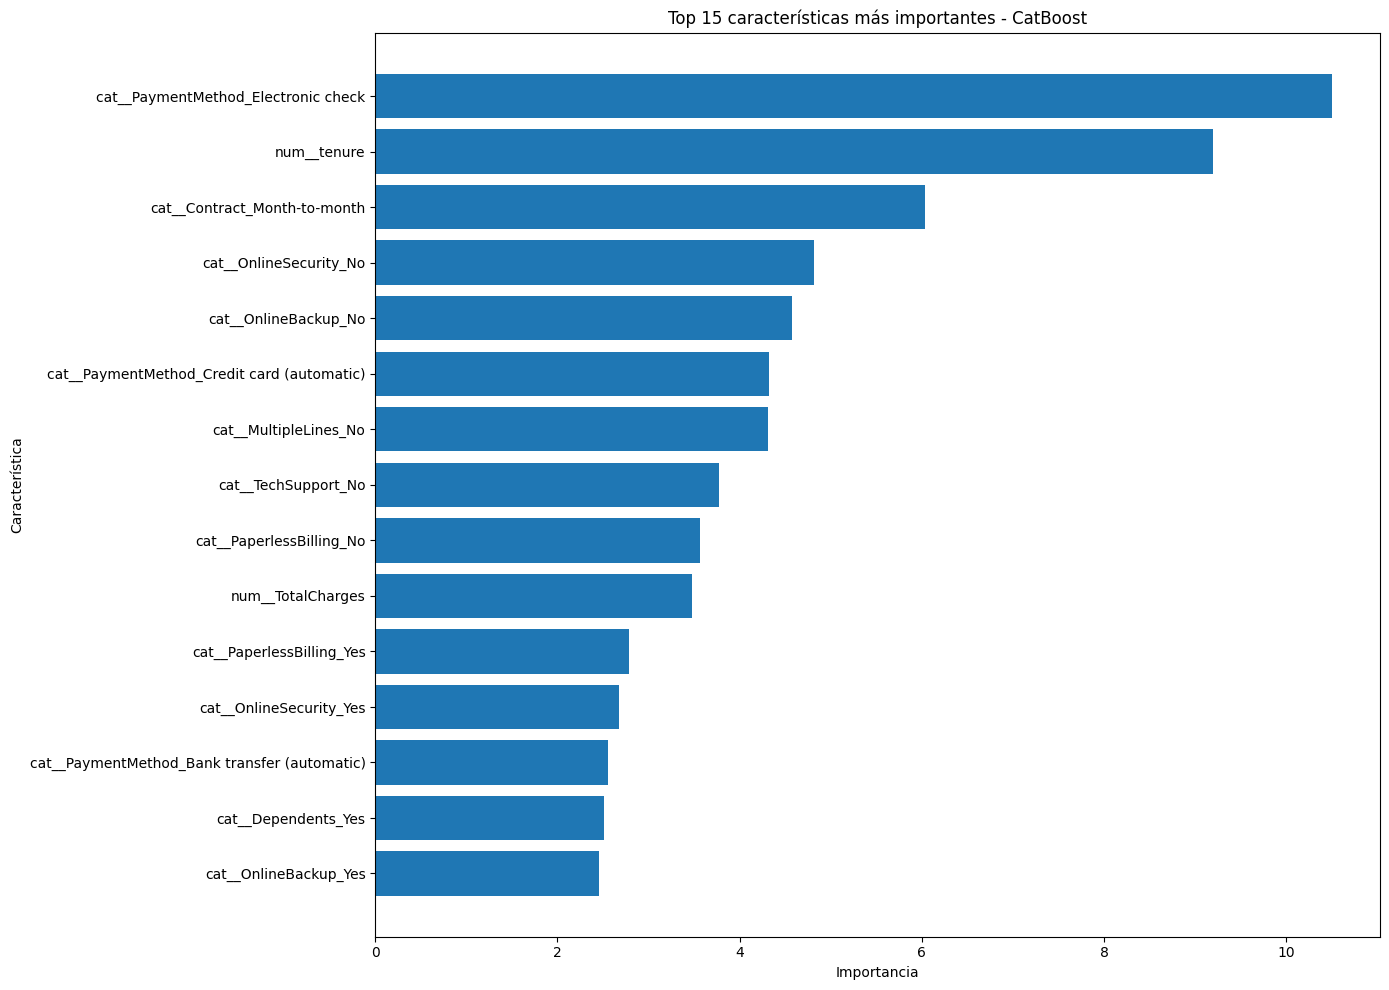

In [56]:
mostrar_importancias("Random Forest", importancias_rf, features_rf)
mostrar_importancias("XGBoost", importancias_xg, features_xg)
mostrar_importancias("LightGBM", importancias_lgbm, features_lgbm)
mostrar_importancias("CatBoost", importancias_cat, features_cat)

Podemos observar que en los 4 modelos generales con gridsearch algunas de las variables mas importantes que se repiten son tenure, Contract Month to Month, Electronic check y Online Security No, estas podriamos considerarlas como las variables mas importantes a tener en cuenta si se quieres saber si hay churn o no

## Exportar mejor modelo

In [59]:
import joblib

In [57]:
mejor_pipeline = resultados_rf['best_model']

In [60]:
# Exporta el pipeline completo
joblib.dump(mejor_pipeline, "app/model.joblib")

print("Pipeline completo exportado en app/model.joblib")

Pipeline completo exportado en app/model.joblib
